# Laboratorio 4. Numpy, Pandas y Matplotlib

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parte 1: Numpy

¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [88]:
xbools = np.random.choice([True, False], size=1000)
print(f"El tamaño del array en bytes es: {xbools.nbytes}")

El tamaño del array en bytes es: 1000


2) Cree un array cuyos elementos sean los enteros pares en
[1,100] y en orden decreciente. Muestre los 10 últimos
por pantalla.

In [ ]:
unoACienPares = np.arange(2, 101, 2)
print(unoACienPares[-10:])

[ 82  84  86  88  90  92  94  96  98 100]


Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5

In [75]:
ejTres = np.array([[2, 4, 5, 6],[0, 3, 7, 4],[8, 8, 5, 2,],[1, 5, 6, 1]])
print(ejTres[1])
print("-------------------------------")
print(ejTres[[0,2], :][:, [0,2]])

[0 3 7 4]
-------------------------------
[[2 5]
 [8 5]]


Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
obtenga la media aritmética de la diferencia (a-b).

In [69]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

print("Media: ", round(np.mean(a-b),2))

Media:  -0.25


Tengo valores de cordenadas (x, y) en las columnas
del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [88]:
ejCinc = np.array([[1.33, 4.5],[30.0, 10.7],[70.2, 0.5]])
ejCinc = np.append(ejCinc, [[37.1, -3.6]], axis=0)
print(ejCinc)
ejCinc.shape

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


(4, 2)

Copie el array del ejercicio anterior. Traspóngalo (.
Agregue ahora dos nuevos pares de coordenadas: (10.8,
3.0) y (35.8, 12.0).

In [96]:
ejSeis = np.transpose(ejCinc)
ejSeis = np.append(ejSeis,[[10.8, 3.0],[35.8, 12.0]], axis=1)

ejSeis


array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 ,  3.  ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 , 35.8 , 12.  ]])

## Parte 2: Exploración y Minería de Datos:

### Carga de Datos

In [3]:
df = pd.read_csv("NucleosPoblacion.csv")
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


¿Cuántos Municipios tienen más de 100000
habitantes?.

In [4]:
df[df["Poblacion"] > 100000]

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
9,9,10,Las Palmas de Gran Canaria,383308.0,35016,Las Palmas de Gran Canaria,35,Las Palmas,-15.413387,28.099775
16,16,17,Telde,100900.0,35026,Telde,35,Las Palmas,-15.416666,27.994202
28,28,29,San Cristóbal de La Laguna,152222.0,38023,San Cristóbal de La Laguna,38,Santa Cruz de Tenerife,-16.314721,28.487893
40,40,41,Santa Cruz de Tenerife,222643.0,38038,Santa Cruz de Tenerife,38,Santa Cruz de Tenerife,-16.247264,28.463257
42,42,43,Badajoz,150376.0,6015,Badajoz,6,Badajoz,-6.970997,38.878743
...,...,...,...,...,...,...,...,...,...,...
683,683,684,Santa Coloma de Gramenet,120060.0,8245,Santa Coloma de Gramenet,8,Barcelona,2.212155,41.453657
689,689,690,Terrassa,212724.0,8279,Terrassa,8,Barcelona,2.012151,41.562363
725,725,726,Lleida,137387.0,25120,Lleida,25,Lleida,0.620619,41.615274
735,735,736,Reus,106622.0,43123,Reus,43,Tarragona,1.109861,41.154107


Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

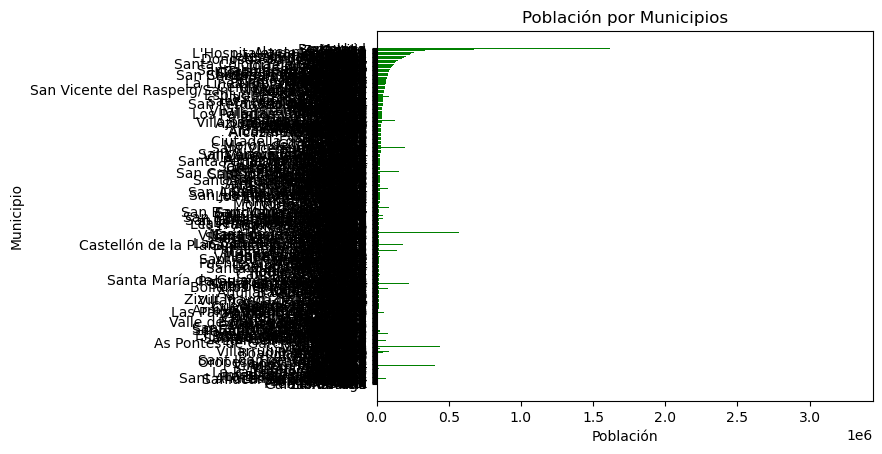

In [80]:
dfSort = df.sort_values('Poblacion')
plt.barh(dfSort['Municipio'], dfSort['Poblacion'], color = 'Green')
plt.title("Población por Municipios")
plt.xlabel("Población")
plt.ylabel("Municipio")
plt.show()

¿Cuántos municipios de La Rioja tienen más de 20,000
habitantes?.

In [5]:
df[(df["Provincia"] == 'La Rioja') & (df["Poblacion"] > 20000)]

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
332,332,333,Calahorra,24876.0,26036,Calahorra,26,La Rioja,-1.960974,42.301555
334,334,335,Logroño,152650.0,26089,Logroño,26,La Rioja,-2.445655,42.466449


¿Cuál es el municipio situado más al Norte? (Usar el
valor de la coordenada "Y" que representa la latitud en
grados). Proporcione también la provincia a la que
pertenece y su población.

In [6]:
df.loc[df["Y"] == df["Y"].max(), ['Municipio', 'Provincia', 'Poblacion']]

,Municipio,Provincia,Poblacion
104,Viveiro,Lugo,16211.0


Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada.

In [64]:
pobGran = df.loc[df['Provincia'] == 'Granada', ['Poblacion']]

print("media: ", np.mean(pobGran))
print("mediana: ", np.median(pobGran))
print("desviación: ", round(np.std(pobGran, axis=0),2))
print("máximo: ", np.max(pobGran, axis=0))
print("mínimo: ", np.min(pobGran, axis=0))


media:  30217.85
mediana:  17526.0
desviación:  Poblacion    49080.46
dtype: float64
máximo:  Poblacion    239154.0
dtype: float64
mínimo:  Poblacion    10386.0
dtype: float64


Realice un histograma con la población de los
Municipios para cada una de las provincias.

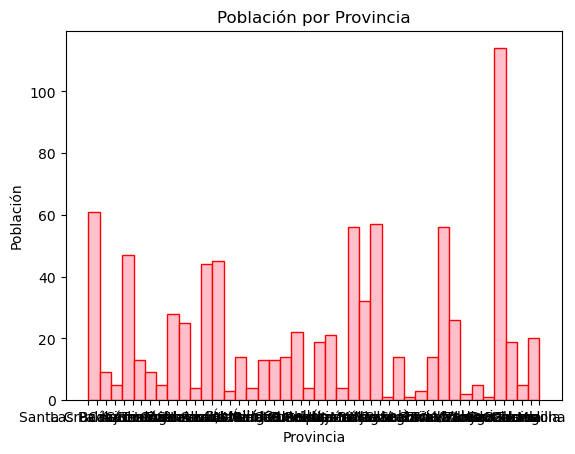

In [86]:
plt.hist(df['Provincia'], bins=40, color='pink', edgecolor='red')
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Población')
plt.show()

Seleccione al azar cincuenta municipios diferentes de
entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y
la desviación estándar de esto 50 municipios?.

In [63]:
filt = df[['Municipio', 'Poblacion']]
azar = filt.sample(n=50,replace=False)
print(azar)
print("--------------------")
print("media: ", round(np.mean(azar['Poblacion']), 2))
print("desviación: ", round(np.std(azar['Poblacion'], axis=0),2))

                                      Municipio  Poblacion
514                                    Alboraya    22409.0
730                                     Amposta    21365.0
466                                      Laredo    12378.0
772                                        Ames    11359.0
715                                      Ripoll    10991.0
661                                       Piera    14576.0
702                                    Banyoles    18780.0
677                    Sant Joan de Vilatorrada    10856.0
528                                  Carcaixent    20935.0
559                                     Torrent    79843.0
279                                    Ogíjares    13255.0
335                           Alcalá de Henares   204120.0
799                                   Cartagena    24350.0
60                        Sanlúcar de Barrameda    66541.0
765                                       Arona    19383.0
792                                    Marbella    33891